[128, 0, 0, 0, 128, 0]
2


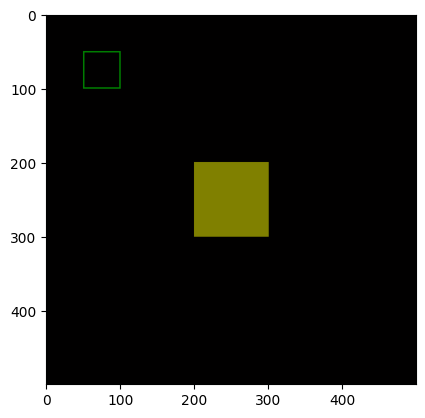

In [54]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import cv2
import numpy as np


def get_color_map_list(num_classes):
    num_classes += 1
    color_map = num_classes * [0, 0, 0]
    for i in range(0, num_classes):
        j = 0
        lab = i
        while lab:
            color_map[i * 3] |= (((lab >> 0) & 1) << (7 - j))
            color_map[i * 3 + 1] |= (((lab >> 1) & 1) << (7 - j))
            color_map[i * 3 + 2] |= (((lab >> 2) & 1) << (7 - j))
            j += 1
            lab >>= 3
    color_map = color_map[3:]
    return color_map

def gray2pseudo_color(img_pil:Image):
    color_map = get_color_map_list(256)
    color_map[:3] = [1, 0, 0]
    img_pil.putpalette(color_map)

print(get_color_map_list(2))

img = Image.new("P", (500, 500))
draw = ImageDraw.Draw(img)
draw.rectangle((50, 50, 100, 100), outline=1, fill=0, width=2)
draw.rectangle((200, 200, 300, 300), outline=2, fill=2)

img_np = np.asarray(img)
print(img_np.max())

img = Image.fromarray(img_np.astype(np.uint8), mode='P')
gray2pseudo_color(img)


plt.imshow(img)
img.save('test.png')

(500, 500)
2


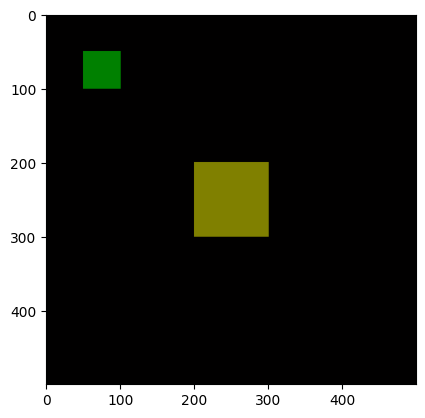

In [52]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt

img =Image.open('test.png')
plt.imshow(img)

img_np = np.asarray(img)
print(img_np.shape)
print(img_np.max())

In [38]:
def long_str(s):
    m = [0] * 128 # ASCII码范围：0-127
    max_len = 0
    i = 0
    for j in range(len(s)):
        j_ascii = ord(s[j])
        i = max(i, m[j_ascii])
        m[j_ascii] = j + 1
        max_len = max(max_len, j - i + 1)
        print(m[j_ascii])
    return max_len

max_len = long_str('abcabc')
print(max_len)

1
2
3
4
5
6
3


In [35]:
a = '12'
print(ord('a'))

97
